In [1]:
import pandas as pd
import numpy as np

## Loading Data

In [2]:
# Load the dataset after the exploratory data analysis
challenge_set_updated = pd.read_csv("./data/challenge_set_updated_v19.csv")
submission_set_updated = pd.read_csv("./data/submission_set_updated_v19.csv")
submission_set = pd.read_csv("./data/final_submission_set.csv")

,callsign,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_ARR_100,track_variation_DEP_40,...,Latitude_ades,Longitude_ades,Altitude_ades,actual_distance,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
0,3840d84f25d3f5fcc0a1be3076bb4039,EGLL,EICK,A320,M,a73f82288988b79be490c6322f4c32ed,18.0,321,2.178394,0.692968,...,51.843,-8.492,154,555.164898,129,277.346455,0.232363,13,0,54748.000000
1,f6f610e73002b8892a239a81321f7f1d,LEBL,KMIA,B772,H,5543e4dc327359ffaf5b9c0e6faaf0e1,13.0,4193,3.166922,6.277936,...,25.793,-80.291,3,7544.863035,-1,285.530704,-0.000133,19,12,185441.000000
2,139670936660762c230ca92556ba842b,ESSA,KORD,A333,H,8be5c854fd664bcb97fb543339f74770,15.0,3770,3.162703,6.245924,...,41.979,-87.904,204,6855.624802,166,305.643136,0.024214,8,15,230396.000000
3,509dc61bb54fbab0e5406067c95603e2,LSZH,KPHL,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,11.0,3607,6.279549,6.208392,...,39.872,-75.241,12,6459.885397,-420,296.005451,-0.065017,2,1,157615.000000
4,d0610d000dcf26b1d7bba8103ecc393d,EIDW,EGLL,A21N,M,a73f82288988b79be490c6322f4c32ed,14.0,305,2.797147,3.230107,...,51.477,-0.461,25,448.923048,-49,116.445141,-0.109150,0,13,70318.447226


## Predictive Model Learning

In [3]:
cat_names = ['callsign',
            'adep', 
            'ades', 
            'aircraft_type', 
            'wtc', 
            'airline',
            'offblock_hour',
            'offblock_minute', 
            'offblock_day_of_week',
            'offblock_weekday_name',
            'offblock_month',
            'offblock_week_of_year', 
            'offblock_season', 
            'arrival_hour',
            'arrival_minute',
            'arrival_season',
            'arrival_weekday_name',
            'is_offblock_weekend',
            'is_offblock_rush_hour',
            'flight_duration_category',                       
            'adep_region', 
            'ades_region', 
            'same_country_flight',
            'same_region_flight',                        
            'flight_direction',
            'is_intercontinental',
            'Manufacturer',
            'Model_FAA',
            'Physical_Class_Engine',
            'FAA_Weight',
            'adep_geo_cluster',
            'ades_geo_cluster']

In [4]:
dataset = pd.concat([challenge_set_updated, submission_set_updated], axis=0)

In [5]:
pd.set_option('display.max_rows', None)

print(dataset.isnull().mean().sort_values(ascending=False))

pd.reset_option('display.max_rows')

vlof_tas                            0.406441
sqrd_tas_1                          0.406441
tas_1                               0.406441
specific_energy_1                   0.406441
sqrd_vlof_tas                       0.406441
vlof_groundspeed                    0.406441
tas_2                               0.372550
specific_energy_2                   0.372550
sqrd_tas_2                          0.372550
sqrd_tas_3                          0.359277
specific_energy_3                   0.359277
tas_3                               0.359277
sqrd_tas_10                         0.356763
specific_energy_10                  0.356763
tas_10                              0.356763
sqrd_tas_9                          0.353705
tas_9                               0.353705
specific_energy_9                   0.353705
tas_4                               0.353320
specific_energy_4                   0.353320
sqrd_tas_4                          0.353320
tas_8                               0.351376
sqrd_tas_8

In [6]:
# Dropping columns with too many NaNs
threshold = 0.4
df = dataset.dropna(thresh=int((1 - threshold) * len(dataset)), axis=1)

In [7]:
# Imputation of NaNs
columns_with_nan = dataset.isna().any()
for col in dataset.columns[columns_with_nan]:
    dataset.loc[:, col] = dataset.fillna(dataset[col].median())

callsign              False
adep                  False
ades                  False
aircraft_type         False
wtc                   False
                      ...  
bearing               False
elevation_gradient    False
adep_geo_cluster      False
ades_geo_cluster      False
tow                    True
Length: 219, dtype: bool


In [8]:
df = dataset.iloc[0:challenge_set_updated.shape[0], :]

In [9]:
X = df.drop('tow', axis=1)
y = df.tow

['tas_1', 'tas_7', 'tas_8', 'tas_9', 'tas_10', 'sqrd_tas_1', 'sqrd_tas_6', 'sqrd_tas_7', 'sqrd_tas_8', 'sqrd_tas_9', 'sqrd_tas_10', 'adep_height_1', 'altitude_1', 'altitude_2', 'altitude_3', 'altitude_4', 'altitude_5', 'altitude_6', 'altitude_7', 'altitude_8', 'altitude_9', 'altitude_10', 'offblock_month', 'arrival_day_of_year', 'arrival_month', 'arrival_week_of_year', 'arrival_quarter', 'offblock_to_arrival_duration', 'normalized_taxi_ratio', 'flight_time_excl_taxi', 'groundspeed_flown_distance_ENR', 'humidity_temperature_ARR', 'humidity_temperature_DEP', 'humidity_temperature_ENR', 'vertical_rate_airspeed_ARR', 'vertical_rate_airspeed_DEP', 'vertical_rate_airspeed_ENR', 'vertical_rate_airspeed_ratio_ARR', 'vertical_rate_airspeed_ratio_DEP', 'groundspeed_airspeed_ratio_ARR', 'MALW_kg', 'mzfw_kg', 'max_fuel_l', 'cargo_capacity', 'oew_kg', 'seats_max', 'actual_distance']


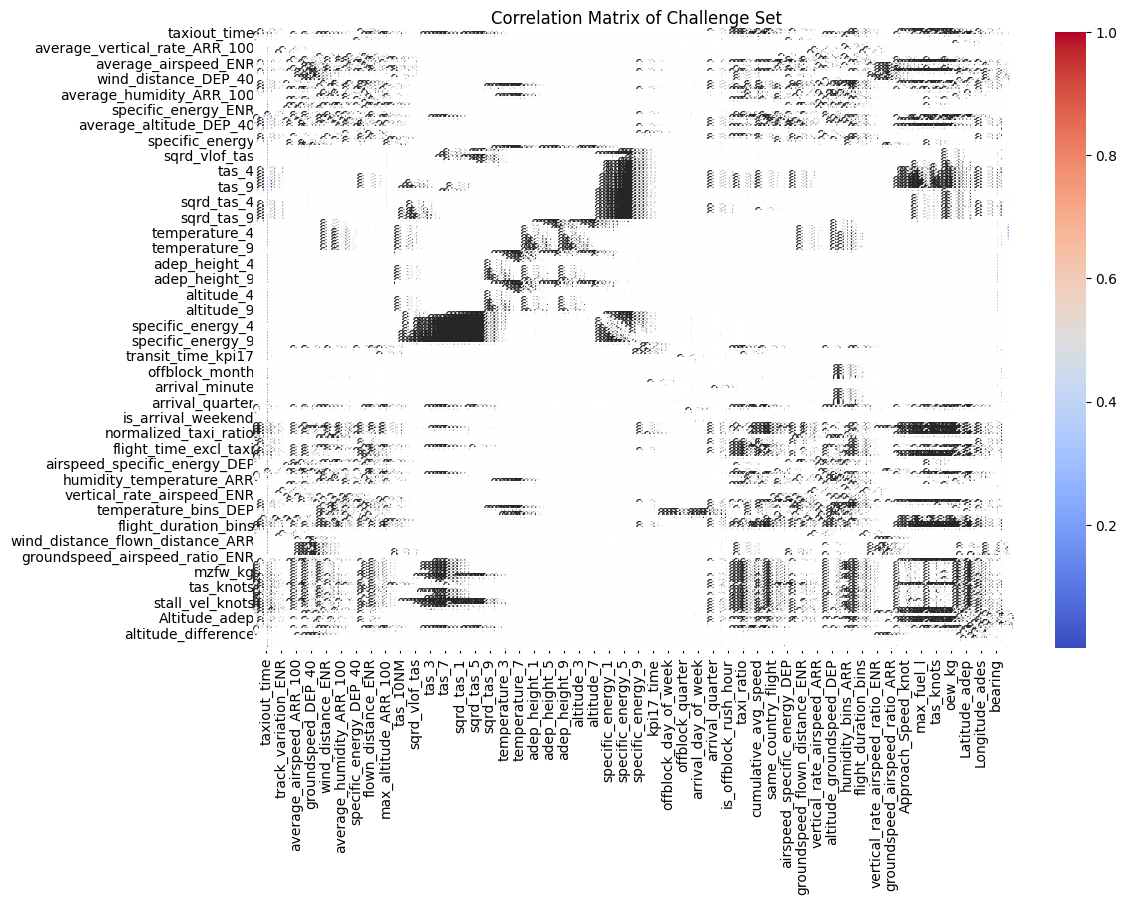

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create correlation matrix
# corr_matrix = X.corr(numeric_only=True).abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.98
# to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
# print(to_drop)

# # Plotting the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Challenge Set')
# plt.show()

# # # Drop features 
# # X.drop(to_drop, axis=1, inplace=True)

In [28]:
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'learning_rate': 0.05, 
    'reg_lambda': 69.07051080443502, 
    'random_strength': 16.348436502754343, 
    'depth': 11, 
    'min_data_in_leaf': 2, 
    'leaf_estimation_iterations': 7
}

selected_cat_names = [x for x in cat_names if x not in X.columns]

train_pool = Pool(X_train, y_train, cat_features=selected_cat_names)
val_pool = Pool(X_val, y_val, cat_features=selected_cat_names)

model = CatBoostRegressor(
    iterations=5000,
    objective=metrics.RMSE(),
    eval_metric=metrics.RMSE(),
    random_seed=42,
    verbose=False,
    task_type='GPU',
    use_best_model=True,
    od_type='Iter',
    od_wait=20,
    **params,
)

In [29]:
result = model.select_features(
    train_pool, eval_set=val_pool,
    features_for_select=X_train.columns.tolist(),
    num_features_to_select=80,
    steps=20,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Step #1 out of 5


KeyboardInterrupt: 

In [ ]:
eliminated_features = ['groundspeed_airspeed_ratio_ENR', 'temperature_9', 'wind_distance_flown_distance_ENR', 'average_humidity_DEP_40', 'vertical_rate_bins_ARR', 
        'groundspeed_flown_distance_ARR', 'arrival_quarter', 'offblock_year', 'arrival_year', 'offblock_to_arrival_day_diff', 'altitude_9', 'tas_1', 
        'is_arrival_weekend', 'adep_height_6', 'sqrd_vlof_tas', 'average_airspeed_ARR_100', 'adep_height_7', 'wind_distance_ARR_100', 'altitude_4', 
        'adep_height_1', 'groundspeed_airspeed_ratio_ARR', 'tas_8', 'specific_energy_4', 'temperature_bins_DEP', 'temperature_6', 'humidity_bins_DEP', 
        'altitude_5', 'adep_height_5', 'sqrd_tas_8', 'sqrd_tas_7', 'specific_energy_7', 'specific_energy_1', 'adep_height_4', 'sqrd_tas_6', 'tas_2', 
        'sqrd_tas_5', 'specific_energy_3', 'altitude_8', 'specific_energy_6', 'adep_height_8', 'vertical_rate_airspeed_ARR', 'altitude_2', 'sqrd_tas_1', 
        'sqrd_tas_3', 'specific_energy_8', 'sqrd_tas_9', 'temperature_8', 'groundspeed_airspeed_ratio_DEP', 'sqrd_tas_4', 'altitude_6', 
        'specific_energy_5', 'humidity_temperature_DEP', 'adep_height_2', 'altitude_7', 'adep_height_3', 'temperature_1', 'specific_energy_2', 
        'temperature_5', 'wind_distance_flown_distance_ARR', 'arrival_month', 'temperature_4', 'groundspeed_ARR_100', 'tas_4', 'arrival_minute', 
        'adep_height_9', 'altitude_groundspeed_ARR', 'altitude_3', 'temperature_7', 'airspeed_specific_energy_ENR', 'altitude_10', 'sqrd_tas_10', 
        'humidity_bins_ARR', 'specific_energy_9', 'sqrd_tas_2', 'temperature_2', 'tas_10', 'average_humidity_ENR', 'offblock_quarter', 
        'airspeed_specific_energy_DEP', 'wind_distance_flown_distance_DEP', 'tas_6', 'flown_distance_ARR_100', 'vertical_rate_airspeed_ratio_ARR', 
        'average_humidity_ARR_100', 'specific_energy_10', 'first_adep_height', 'tas_3', 'temperature_3', 'track_variation_ARR_100', 
        'is_offblock_rush_hour', 'average_temperature_ENR', 'is_arrival_rush_hour', 'average_altitude_ARR_100', 'specific_energy_ENR', 
        'groundspeed_ENR', 'is_offblock_weekend', 'Num_Engines', 'temperature_bins_ARR', 'average_temperature_ARR_100', 'kpi17_time', 
        'average_airspeed_DEP_40', 'wind_distance_ENR', 'offblock_minute', 'groundspeed_10NM', 'average_vertical_rate_ARR_100', 'vlof_tas', 
        'humidity_temperature_ARR']

In [44]:
X.drop(eliminated_features, axis=1, inplace=True)

In [47]:
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'learning_rate': 0.01, 
    'reg_lambda': 0.05357182104973179, 
    'random_strength': 20.10951792232919, 
    'depth': 9, 
    'min_data_in_leaf': 11, 
    'leaf_estimation_iterations': 12
}

selected_cat_names = [x for x in cat_names if x in X.columns]

train_pool = Pool(X_train, y_train, cat_features=selected_cat_names)
val_pool = Pool(X_val, y_val, cat_features=selected_cat_names)

model = CatBoostRegressor(
    iterations=100000,
    objective=metrics.RMSE(),
    eval_metric=metrics.RMSE(),
    random_seed=42,
    verbose=False,
    task_type='GPU',
    use_best_model=True,
    od_type='Iter',
    od_wait=50,
    **params,
)

In [49]:
model.fit(
    train_pool, eval_set=val_pool,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
model.save_model('catboost_train_v99.cbm', 'cbm')

In [51]:
y_pred = model.predict(X_val)
pd.DataFrame(data={'tow': y_pred}).to_csv('catboost_val_v99.csv', index=False)

In [103]:
def classify_aircraft(row):
    if row['Physical_Class_Engine'] == 'Turboprop' and row['wtc'] == 'M':
        return 'Medium Turbo Prop'
    elif row['Physical_Class_Engine'] == 'Jet' and row['wtc'] == 'M':
        return 'Medium Jet'
    elif row['Physical_Class_Engine'] == 'Jet' and row['wtc'] == 'H':
        return 'Heavy Jet'
    else:
        return None  # If no classification applies, return None

In [51]:
from sklearn.metrics import root_mean_squared_error

X_val_groups = X_val.copy()

X_val_groups['Aircraft_Class'] = X_val.apply(classify_aircraft, axis=1)

X_val_groups = X_val_groups.reset_index()

indices_m_prop = X_val_groups[X_val_groups['Aircraft_Class'] == 'Medium Turbo Prop'].index
indices_m_jet = X_val_groups[X_val_groups['Aircraft_Class'] == 'Medium Jet'].index
indices_h_jet = X_val_groups[X_val_groups['Aircraft_Class'] == 'Heavy Jet'].index

print('RMSE Medium Turbo Prop:', root_mean_squared_error(y_val.iloc[indices_m_prop], y_pred.iloc[indices_m_prop]))
print('RMSE Medium Jet:', root_mean_squared_error(y_val.iloc[indices_m_jet], y_pred.iloc[indices_m_jet]))
print('RMSE Heavy Jet:', root_mean_squared_error(y_val.iloc[indices_h_jet], y_pred.iloc[indices_h_jet]))

In [52]:
best_iteration = model.get_best_iteration()
model = CatBoostRegressor(
    iterations=best_iteration,
    objective=metrics.RMSE(),
    random_seed=42,
    verbose=False,
    task_type='GPU',
    **params,
)
model.fit(
    X, y,
    cat_features=selected_cat_names, 
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [53]:
model.save_model('catboost_all.cbm', 'cbm')

In [54]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

FAA_Weight: 18.545701007558613
airline: 7.661040383185832
length_m: 6.3785858562918225
wtc: 6.010688992018923
seats_max: 5.107682662686716
oew_kg: 4.868031823251285
height_m: 4.420336109380463
stall_vel_knots: 4.256282856242131
seats_min: 3.464153472684745
Manufacturer: 3.4499987445883393
wingspan_m: 2.8722591074407613
seats_typ: 2.703917168011841
aircraft_type: 2.657104029331265
tas_knots: 2.3647835922866003
Approach_Speed_knot: 1.9932409756119862
MALW_kg: 1.804275591339054
flight_duration_category: 1.4320489425934846
max_fuel_l: 1.3558487735191853
MTOW_kg: 1.3039010153223163
Model_FAA: 1.282771813887156
average_altitude_ENR: 0.9819737985376831
range_km: 0.8370433520796343
cargo_capacity: 0.8062794580790142
actual_distance: 0.7911827487484737
speed_per_distance: 0.6867728888518027
flown_distance_ENR: 0.6470145690079374
flown_distance: 0.5620560004952326
offblock_to_arrival_duration: 0.5569487937707901
mzfw_kg: 0.5541440139349894
flight_time_excl_taxi: 0.46417573556525715
groundspeed_f

In [ ]:
import matplotlib

feature_im_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importances
})

feature_im_df = feature_im_df.sort_values(by="importance", ascending=False)

sns.set(rc={'text.usetex' : True, 'text.latex.preamble': '\\usepackage{libertine}'})
plt.figure(figsize=(10, 6))
plt.figure()
sns.barplot(data = feature_im_df[:20], x='importance', y='feature', palette="viridis")

plt.title("CatBoost feature importance")
plt.xlabel("Importance")
plt.ylabel("feature")
plt.tight_layout()
plt.savefig('catboost_feature_importance.pdf', bbox_inches='tight')
plt.show()

In [ ]:
model = CatBoostRegressor(**params).fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

## Preparing Submission

In [91]:
df_test = dataset.iloc[challenge_set_updated.shape[0]:, :]
df_test.head()

,callsign,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_ARR_100,track_variation_DEP_40,...,Latitude_ades,Longitude_ades,Altitude_ades,actual_distance,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
0,3b3de0f3ad0ee192513995c02f7bf7cf,LTFJ,LFLL,B738,M,6351ec1b849adacc0cbb3b1313d8d39b,15.0,1122,1.668989,1.079187,...,45.726,5.091,251,2022.915548,-61,293.477205,-0.030154,11,17,63852.0
1,e06dd03d4a879ca37d9e18c1bd7cad16,EBBR,KJFK,A333,H,bdeeef3a675587d530de70a25d7118d2,15.0,3205,1.766098,1.147364,...,40.640,-73.779,4,5886.430370,-53,291.395141,-0.009004,6,1,63852.0
2,2d3b1c962c78c4ebeef11bcd51b9e94c,KMIA,EGLL,B77W,H,5543e4dc327359ffaf5b9c0e6faaf0e1,10.0,3965,6.253309,1.292737,...,51.477,-0.461,25,7108.920003,22,43.036806,0.003095,12,13,63852.0
3,35f7721f68bf85128195547ae38b0f04,EBBR,LEAL,B738,M,f53c55b5cf0cbb3be755bf50df6fa52d,9.0,802,1.775667,0.905718,...,38.282,-0.558,44,1458.405355,-13,197.753476,-0.008914,6,19,63852.0
4,eb56918bee9bc5204624186b9bcc4391,LSZH,LFPG,BCS3,M,2d5def0a5a844b343ba1b7cc9cb28fa9,11.0,292,1.200644,1.204058,...,49.013,2.550,120,476.291487,-312,293.398537,-0.655061,2,6,63852.0


In [92]:
X_test = df_test.drop('tow', axis=1)

In [93]:
X_test = X_test.loc[:, X_test.columns.isin(X.columns)]

In [94]:
y_pred = model.predict(X_test)
y_test = y_pred
print(y_test)

[ 70299.3060802  215033.21321674 222292.81149927 ... 195766.30711585
  42894.6546126   63115.89375294]


In [97]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = y_test
dft0[['flight_id', 'tow']].to_csv('catboost.csv', index=False)

In [98]:
print((df_test['aircraft_type'] == submission_set_updated['aircraft_type']).mean())

1.0


In [101]:
submission_dataset = df_test
submission_dataset['tow'] = y_pred
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())
mask = (submission_dataset['tow'] > submission_dataset['MTOW_kg'])
submission_dataset.loc[mask, 'tow'] = submission_dataset.loc[mask, 'MTOW_kg']
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())

19698
0


C:\Users\rudog\AppData\Local\Temp\ipykernel_58572\964579717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_dataset['tow'] = y_pred


In [65]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = submission_dataset['tow']
dft0[['flight_id', 'tow']].to_csv('catboost_submission.csv', index=False)